# 5. 이진수 변환
[문제 링크](https://www.acmicpc.net/problem/10829)

In [3]:
n = int(input())
print(f'{n:b}')

11


## 성공
- 파이썬 기본 제공 기능인 문자열.format을 쓸 경우 매우 쉬움.
- 재귀를 이용한 버전으로 다시 풀어봐야 할듯.

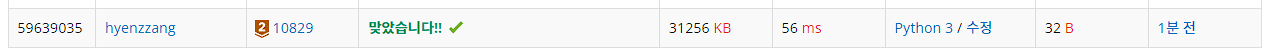

In [9]:
n = int(input())

# n을 입력받아 2진수로 변환하여 출력하는 함수
def to_binary(n):
    # n이 0이면 빈 문자열을 반환
    if n == 0:
        return ''
    # n//2는 to_binary()에 넣어 재귀적으로 호출
    # n%2는 2로 나눈 나머지를 문자열로 변환하여 더함
    return to_binary(n//2) + str(n%2)

print(to_binary(n))

'101'

## 성공
- n진법이란 결국 n을 나눈 나머지들을 줄세워놓은것.
    - 19 => 10으로 나누면, 몫 1 나머지 9, 몫 1을 다시 나누면 나머지 1
    - 뒤에서 계산한 결과가 앞으로 붙어야함.
- 재귀적인 방식을 이용해 2진법으로 변환성공.
- 같은 방식으로 어떤 진법으로든 변환 가능함.

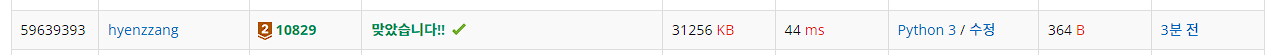

# 6. 팩토리얼
[문제 링크](https://www.acmicpc.net/problem/10872)

In [10]:
def factorial(x):
    # 1! = 1, 0! = 1
    if x == 1 or x == 0: return 1
    # x! = x * (x-1)!
    return x * factorial(x - 1)

n = int(input())
print(factorial(n))

479001600


## 성공
- 팩토리얼의 정의에 따라 예외처리해 주어야 할 것이 있음.
    - 0! = 1
    - 1! = 1
    - 0!을 깜빡하고 예외처리 안했다가 런타임 에러.
- 팩토리얼이나 피보나치는 재귀적으로 구하기 쉬움.

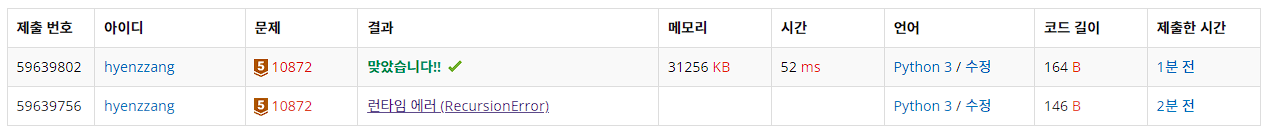

# 7. 괄호 변환
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/60058)

In [42]:
# 문자열 s가 균형잡힌 괄호 문자열인지 판단하는 함수
# 빈 문자열이면 False를 반환
def is_balanced(s):
    if s != '':
        if s.count('(') == s.count(')'):
            return True
    return False

# 문자열 s가 올바른 괄호 문자열인지 판단하는 함수
# 이미 균형잡힌 괄호 문자열이라고 가정
# 스택을 이용하여 판단 -> 이전 문제에서 사용한 방법
def is_correct(s):
    stack = []
    for p in s:
        if p == '(':
            stack.append(p)
        else:
            try:
                stack.pop()
            except:
                return False
    if stack != []:
        return False
    return True  

# 4-4 단계에서 사용하는 함수
def del_and_reverse(s):
    # 문자열의 첫 번째와 마지막 문자를 제거
    s = s[1:-1]
    # 나머지 문자열의 괄호 방향을 뒤집기
    s = [')' if p == '(' else '(' for p in s]
    # 리스트를 문자열로 변환
    s = ''.join(s)
    return s

# 문자열 s를 올바른 괄호 문자열로 변환하는 함수
def to_correct(s):
    # 1. 입력이 빈 문자열인 경우, 빈 문자열을 반환합니다.
    if s == '': return ''
    for i in range(len(s)+1):
        if is_balanced(s[:i]):
            # 2. 문자열 w를 두 "균형잡힌 괄호 문자열" u, v로 분리합니다.
            # i가 문자열의 길이 + 1 과 같다면 u = s, v = ''
            u, v = (s[:i], s[i:]) if i != len(s)+1 else (s, '')
            if is_correct(u):
                # 3. 문자열 u가 "올바른 괄호 문자열"이라면 문자열 v에 대해 1단계부터 다시 수행합니다.
                # 3-1. 수행한 결과 문자열을 u에 이어 붙인 후 반환합니다. 
                print(u, v)
                return u + to_correct(v)
            else:
                # 4. 문자열 u가 "올바른 괄호 문자열"이 아니라면 아래 과정을 수행합니다. 
                    # 4-1. 빈 문자열에 첫 번째 문자로 '('를 붙입니다. 
                    # 4-2. 문자열 v에 대해 1단계부터 재귀적으로 수행한 결과 문자열을 이어 붙입니다. 
                    # 4-3. ')'를 다시 붙입니다. 
                    # 4-4. u의 첫 번째와 마지막 문자를 제거하고, 나머지 문자열의 괄호 방향을 뒤집어서 뒤에 붙입니다. 
                    # 4-5. 생성된 문자열을 반환합니다.
                return '(' + to_correct(v) + ')' + del_and_reverse(u)

def solution(p):
    answer = to_correct(p)
    return answer

## 성공
- 문제에서 주어진 알고리즘에 따라 충실히 기능 구현.
- 모든 기능이 몰려있으면 가독성이 좋지않아 함수로 따로 구현.
- 나중에 알아보기 쉬운 코드로 만드는것을 중요하게 생각중.

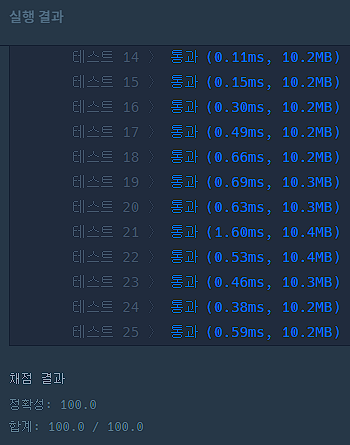